# FA24BUAN670BB - Data Mining - Course Project - Professional Players' Rating Prediction using Linear Regression

<hr class="solid"> <H2> Sacred Heart University - Jack Welch College of Business & Technology </br>

<H4> <b> Instructor: </b> Dr. Sonal Vats </br>

<H4>
<b> Team: </b> </br> Thamson Antony Arockiasamy (0940430-arockiasamyt) - MS in Business Analytics </br> Sai Keerthana Mallipeddi (0940439-mallipeddis3) - MS in Business Analytics</H4>

<hr class="solid">

<img src="Counter Strike Global Offense.png" alt="Project Poster" width="700" height="700">

<hr class="solid">

# Importing Libraries

In [1]:
import folium # To create maps
import numpy as np # To perform calculations
import pandas as pd # To work with dataframes
import seaborn as sns # To create plots
from sklearn.model_selection import train_test_split # To split the data into training and testing sets
import matplotlib.pyplot as plt # To create plots
from sklearn.linear_model import LinearRegression # To create a linear regression model
from sklearn.metrics import mean_squared_error, r2_score # To evaluate the model

# Loading the dataset

In [2]:
df = pd.read_csv(f"hltv_playerStats-complete.csv")
df.head(5)

,nick,country,stats_link,teams,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
0,ZywOo,France,https://www.hltv.org//stats/players/11893/zywoo,"['Vitality', 'aAa']",970,25491,5917,1.38,1.27,21602,41.3,15685,3.6,0.85,0.13,0.62,0.10,0.12,74.9,1.45
1,s1mple,Ukraine,https://www.hltv.org//stats/players/7998/s1mple,['Natus Vincere'],1532,40464,8864,1.34,1.25,34647,41.3,25783,2.4,0.86,0.10,0.64,0.08,0.11,74.2,1.36
2,sh1ro,Russia,https://www.hltv.org//stats/players/16920/sh1ro,"['Gambit Youngsters', 'Gambit']",847,22465,5361,1.45,1.23,17320,27.9,11959,3.9,0.77,0.11,0.53,0.08,0.11,76.3,1.21
3,deko,Russia,https://www.hltv.org//stats/players/20113/deko,['1WIN'],378,10219,2225,1.37,1.22,8219,36.9,5994,3.3,0.80,0.10,0.59,0.09,0.11,74.5,1.21
4,Kaze,Malaysia,https://www.hltv.org//stats/players/8950/kaze,"['ViCi', 'Flash', 'MVP.karnal']",829,21617,4118,1.32,1.20,16957,30.3,12839,2.9,0.78,0.11,0.59,0.08,0.10,73.7,1.24


# Data Analysis

## General Information

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nick                         803 non-null    object 
 1   country                      803 non-null    object 
 2   stats_link                   803 non-null    object 
 3   teams                        803 non-null    object 
 4   maps_played                  803 non-null    int64  
 5   rounds_played                803 non-null    int64  
 6   kd_difference                803 non-null    int64  
 7   kd_ratio                     803 non-null    float64
 8   rating                       803 non-null    float64
 9   total_kills                  803 non-null    int64  
 10  headshot_percentage          803 non-null    float64
 11  total_deaths                 803 non-null    int64  
 12  grenade_damage_per_round     803 non-null    float64
 13  kills_per_round     

## Description

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
maps_played,803.0,833.174346,402.388811,374.00,500.50,734.00,1059.00,2169.00
rounds_played,803.0,21893.596513,10607.751477,9498.00,13227.00,19174.00,27881.00,56914.00
kd_difference,803.0,585.465753,1475.806605,-6238.00,-283.00,358.00,1313.50,8864.00
kd_ratio,803.0,1.035430,0.092114,0.74,0.98,1.03,1.09,1.45
rating,803.0,1.011880,0.066560,0.77,0.97,1.01,1.05,1.27
total_kills,803.0,15142.087173,7539.729631,5530.00,9092.50,13132.00,19214.00,40884.00
headshot_percentage,803.0,45.462017,8.416641,23.60,40.50,47.30,51.45,68.40
total_deaths,803.0,14556.518057,7018.031710,5994.00,8842.50,12603.00,18226.50,38351.00
grenade_damage_per_round,803.0,4.061395,1.187467,1.40,3.20,3.90,4.80,9.10
kills_per_round,803.0,0.688904,0.044705,0.52,0.66,0.69,0.72,0.86


## Separating Numeric and Text Data and stored in dedicated dataframes

In [6]:
df_numeric = df.select_dtypes(include=[np.number])
df_categoric = df.select_dtypes(exclude=[np.number])

df_numeric_cols = list(df_numeric.columns)
df_categoric_cols = list(df_categoric.columns)

# Exploratory Data Analysis

## Histogram to find the data distribution

array([[<Axes: title={'center': 'maps_played'}>,
        <Axes: title={'center': 'rounds_played'}>,
        <Axes: title={'center': 'kd_difference'}>,
        <Axes: title={'center': 'kd_ratio'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'total_kills'}>,
        <Axes: title={'center': 'headshot_percentage'}>,
        <Axes: title={'center': 'total_deaths'}>],
       [<Axes: title={'center': 'grenade_damage_per_round'}>,
        <Axes: title={'center': 'kills_per_round'}>,
        <Axes: title={'center': 'assists_per_round'}>,
        <Axes: title={'center': 'deaths_per_round'}>],
       [<Axes: title={'center': 'teammate_saved_per_round'}>,
        <Axes: title={'center': 'saved_by_teammate_per_round'}>,
        <Axes: title={'center': 'kast'}>,
        <Axes: title={'center': 'impact'}>]], dtype=object)

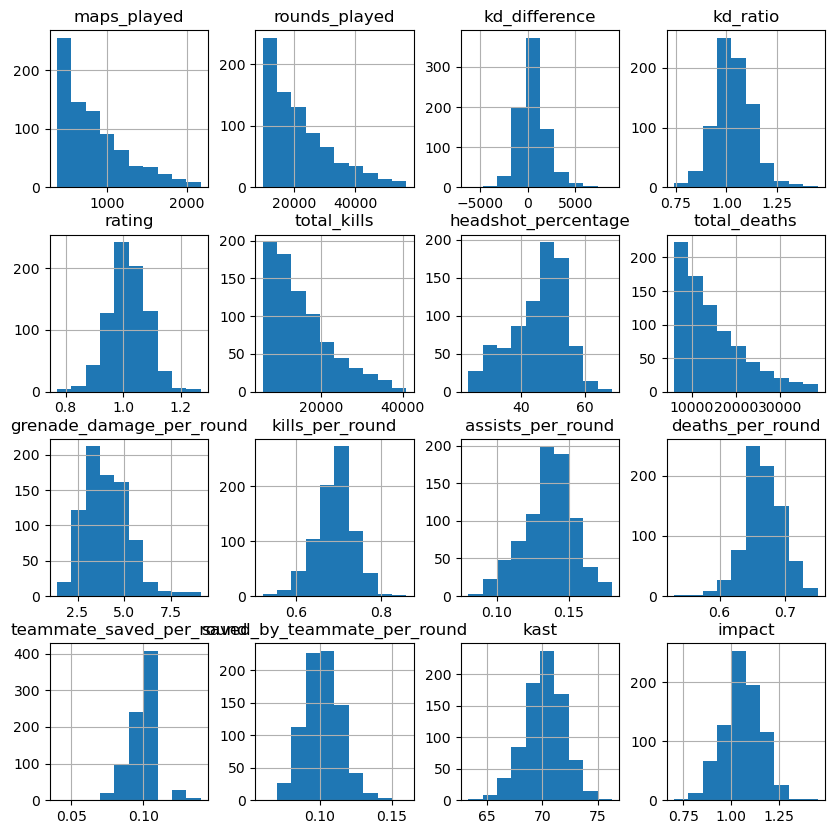

In [7]:
df_numeric.hist(figsize=(10, 10)) # Histograms of the numeric columns

## Country Demographics

In [8]:
df_countrycounts = pd.DataFrame(df['country'].value_counts()) # Count of players from each country
df_countrycounts['countries'] = df_countrycounts.index # Create a new column with the country names
df_countrycounts = df_countrycounts.reset_index(drop=True) # Reset the index
df_countrycounts.columns = ['counts', 'country'] # Rename the columns

df_countrycounts.sample(5)  # Display a random sample of 5 rows

,counts,country
27,6,Romania
41,2,Switzerland
13,23,Bulgaria
46,1,North Macedonia
7,28,China


In [9]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data' # Base URL for the latest Geographic Information System (GIS) data
country_shapes = f'{url}/world-countries.json' # URL for the country shapes

In [10]:
df_countrycounts.replace('United States', "United States of America", inplace = True) # Replace 'United States' with 'United States of America' to match the country names in the country_shapes data

In [11]:
m = folium.Map()    # Create a map
folium.Choropleth(
    geo_data=country_shapes,
    name='Players Counts by Country',
    data=df_countrycounts,
    columns=['country', 'counts'],
    key_on='feature.properties.name',
    nan_fill_color='grey'
).add_to(m) 
m  # Display the map

## Analysis by Countries

In [ ]:
to_remove_countries = list(df_countrycounts.loc[df_countrycounts['counts'] < 5]['country']) # List of countries with less than 5 players
df_c = df[~df['country'].isin(to_remove_countries)] # Remove the countries with less than 5 players
df_c_means = df_c.groupby('country').agg(lambda x: x.mean() if np.issubdtype(x.dtype, np.number) else x.head(1)) # Calculate the mean of the numeric columns for each country
df_c_means = df_c_means.reset_index() # Reset the index

In [13]:
to_plot_countries = list(df_countrycounts.head(11)['country']) # Plotting the top 10 countries with the most players
df_to_plot_countries = df_c_means[df_c_means['country'].isin(to_plot_countries)] # Filter the data for the top 10 countries
df_to_plot_countries # Display the data

,country,nick,stats_link,teams,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
1,Australia,Texta,https://www.hltv.org//stats/players/11847/texta,"['Chiefs', 'Athletico', 'Dark Sided']",656.347826,16899.260870,643.891304,1.049348,1.024348,11841.369565,44.706522,11197.391304,4.413043,0.697174,0.135652,0.666739,0.096522,0.097174,70.330435,1.080000
4,Brazil,coldzera,https://www.hltv.org//stats/players/9216/coldzera,"['SK', 'FaZe', 'Luminosity', 'MIBR']",770.118644,20068.847458,888.915254,1.066949,1.031356,13972.677966,44.006780,13083.762712,4.242373,0.695763,0.132712,0.653390,0.094407,0.096102,71.108475,1.073051
7,China,DANK1NG,https://www.hltv.org//stats/players/16207/dank1ng,"['TYLOO', 'EHOME']",693.285714,17936.714286,663.178571,1.049286,1.028929,12733.821429,47.978571,12070.642857,3.514286,0.708929,0.136071,0.676071,0.100000,0.099643,70.878571,1.087857
9,Denmark,device,https://www.hltv.org//stats/players/7592/device,"['Astralis', 'TSM']",945.013889,24905.805556,507.847222,1.026528,1.001944,16955.375000,45.854167,16447.555556,4.330556,0.676944,0.127500,0.660833,0.096944,0.097778,69.962500,1.036389
11,Finland,Jamppi,https://www.hltv.org//stats/players/14087/jamppi,"['SJ', 'ENCE']",865.230769,22947.423077,489.576923,1.020000,1.000769,15730.884615,43.173077,15241.307692,4.673077,0.681538,0.135385,0.669231,0.094231,0.096154,69.757692,1.046923
12,France,ZywOo,https://www.hltv.org//stats/players/11893/zywoo,"['Vitality', 'aAa']",1084.807692,28571.000000,912.807692,1.030769,1.007692,19797.423077,47.315385,18884.500000,3.830769,0.681538,0.129615,0.662308,0.096154,0.093846,69.907692,1.033462
13,Germany,syrsoN,https://www.hltv.org//stats/players/7266/syrson,"['BIG', 'ALTERNATE aTTaX', 'Sprout']",1083.000000,28617.760000,27.360000,0.998000,0.985600,19256.880000,45.900000,19229.520000,4.276000,0.671600,0.130400,0.674000,0.096400,0.093200,69.120000,1.020800
21,Poland,mhL,https://www.hltv.org//stats/players/16847/mhl,"['MOUZ NXT', 'AGO']",1007.750000,26814.173077,308.115385,1.014423,0.997115,18362.711538,44.238462,18054.423077,4.217308,0.682308,0.131154,0.673269,0.091923,0.092308,69.392308,1.037115
24,Russia,sh1ro,https://www.hltv.org//stats/players/16920/sh1ro,"['Gambit Youngsters', 'Gambit']",850.250000,22538.656250,574.156250,1.038125,1.008750,15476.828125,45.309375,14902.656250,3.915625,0.684063,0.127344,0.663438,0.090781,0.091250,69.779687,1.050625
29,Sweden,FREDDyFROG,https://www.hltv.org//stats/players/9277/fredd...,"['Chaos', 'Red Reserve', 'Apeks', 'Japaleno', ...",1016.730769,26847.519231,672.807692,1.025962,1.003462,18537.942308,45.859615,17865.076923,4.400000,0.683462,0.134615,0.667115,0.092500,0.094615,69.571154,1.039038


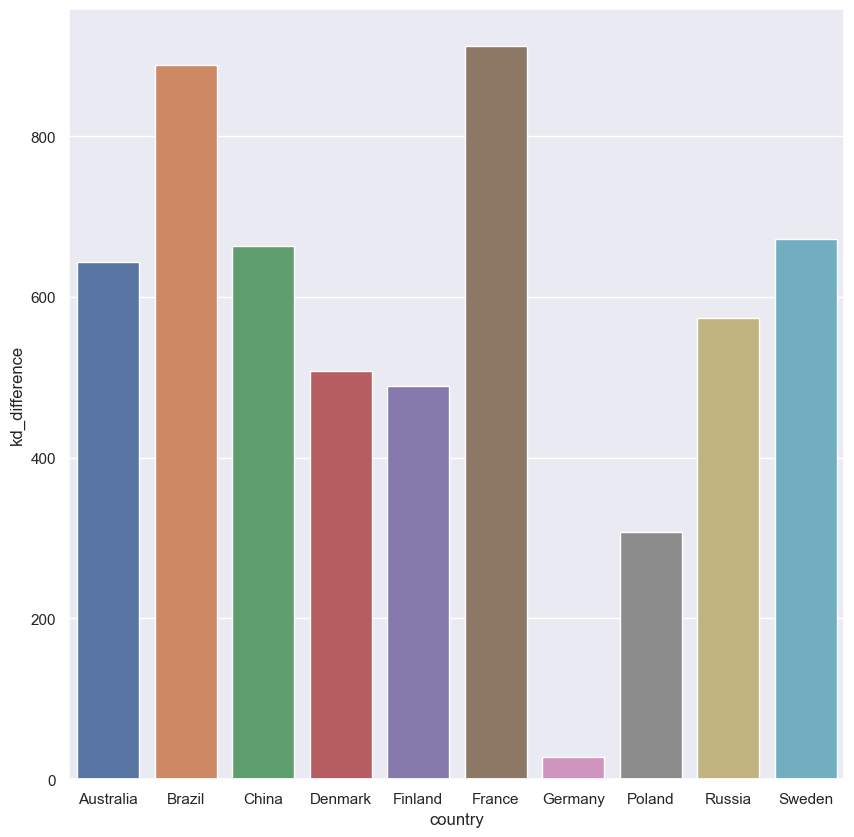

In [14]:
sns.set(rc={'figure.figsize':(10, 10)}) # Set the size of the plot
sns.barplot(x='country', y='kd_difference', data=df_to_plot_countries); # Create a bar plot of the top 10 countries with the most players

## Correlation Matrix

In [15]:
rearrangement_cols = ['maps_played','rounds_played','kd_difference','kd_ratio','total_kills','headshot_percentage','total_deaths',
 'grenade_damage_per_round','kills_per_round','assists_per_round','deaths_per_round','teammate_saved_per_round','saved_by_teammate_per_round',
 'kast','impact','rating'] # Rearrangement of the columns
df_numeric = df_numeric[rearrangement_cols] 

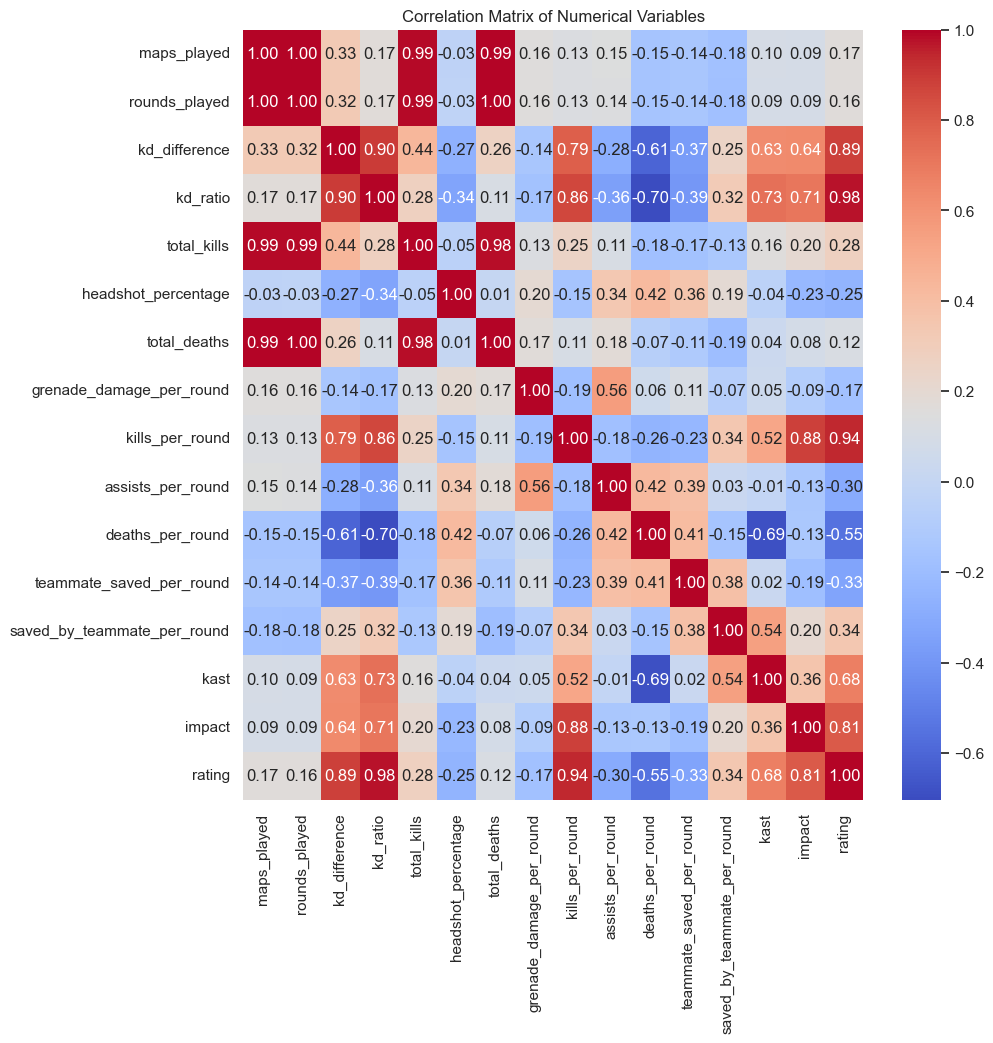

In [16]:
correlation_matrix = df_numeric.corr() # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm") # Create a heatmap of the correlation matrix
plt.title("Correlation Matrix of Numerical Variables") # Set the title of the plot
plt.show() # Display the plot

# Regression Analysis

## Feature Selection

In [17]:
selected_features = ['rating', 'kd_ratio', 'kills_per_round', 'kd_difference', 'impact'] # Select the features with the highest correlation with the target variable
selected_features_cleaned = df[selected_features].apply(pd.to_numeric, errors='coerce').dropna() # Convert the selected features to numeric and remove any missing values

In [18]:
X = selected_features_cleaned[['kd_ratio', 'kills_per_round', 'kd_difference', 'impact']] # Features
y = selected_features_cleaned['rating']    # Target variable

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets

In [20]:
model = LinearRegression() # Train Linear Regression model
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test) # Predict on test data

In [22]:
# Model Evaluation
print("\nModel Coefficients:")
print(model.coef_)
print("\nMean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))


Model Coefficients:
[4.66022327e-01 5.31377843e-01 2.61404548e-07 1.93661277e-02]

Mean Squared Error (MSE): 3.610684947552941e-05
R-squared (R²): 0.9918141377813222


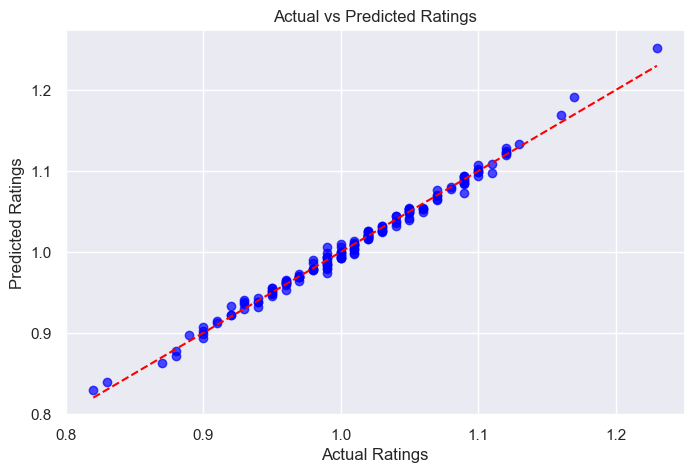

In [23]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()